<a href="https://colab.research.google.com/github/Vahideh115/Exercises/blob/main/ML_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  اتصال به گوگل درایو
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# خواندن داده های فایل csv :مرحله یک
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loans.csv')
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [ ]:
# مرحله دوم: تشخیص و پردازش مقادیر گم شده
nullvalues=df.isnull().sum()
print(nullvalues)

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


In [ ]:
# مرحله سوم روش اول : تشخیص و پردازش مقادیر پرت
from scipy import stats
df['Z-Score']=stats.zscore(df['loan_amount'])
outliners=df[abs(df['Z-Score'])>3]
outliners


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-Score


In [ ]:
# مرحله سوم روش دوم : تشخیص و پردازش مقادیر پرت
# محاسبه چارک ها
Q1=df['rate'].quantile(0.25)
Q3=df['rate'].quantile(0.75)
IQR=Q3-Q1
# تعیین محدوده مجاز داده
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
# شناسایی داده های پرت
outliners=df[(df['rate']<lower_bound) | (df['rate']>upper_bound)]
outliners

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-Score
41,41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,-1.208036
195,48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,-0.399290
421,49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,0.036152


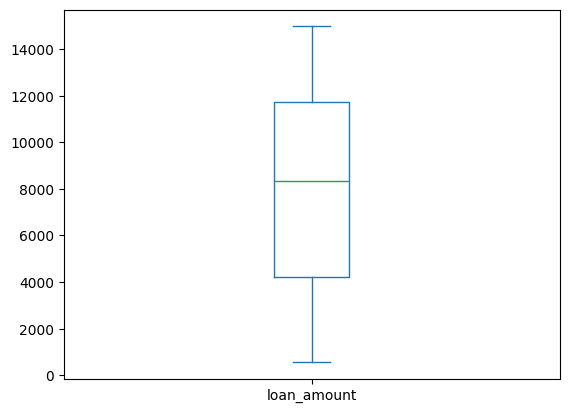

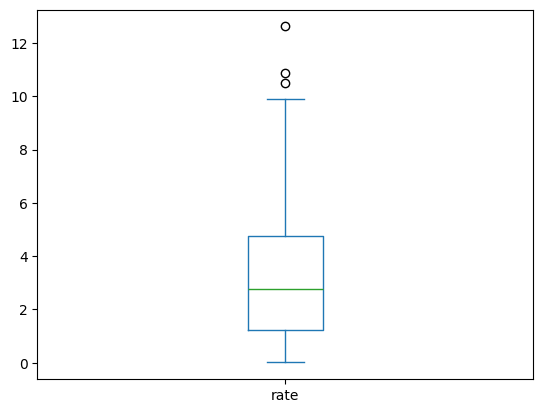

In [ ]:
# مرحله سوم روش سوم
from matplotlib import pyplot as plt
df['loan_amount'].plot(kind='box')
plt.show()

df['rate'].plot(kind='box')
plt.show()


lower_bound=q1 - 1.5 * IQR
upper_bound=q1 - 1.5 * IQR
outliners=df()*italicized text*

In [ ]:
# مرحله چهارم: تبدیل متغیرها
# محاسبه میزان چولگی
print(df['loan_amount'].skew())

-0.04011522267119772


In [ ]:
#مرحله چهارم: تبدیل رادیکالی برای چولگی منفی
from scipy.stats import boxcox
df['BoxCox_Value'],lambda_value=boxcox(df['loan_amount']+abs(df['loan_amount'].min()))
print(df)

     client_id loan_type  loan_amount  repaid  loan_id  loan_start  \
0        46109      home        13672       0    10243  2002-04-16   
1        46109    credit         9794       0    10984  2003-10-21   
2        46109      home        12734       1    10990  2006-02-01   
3        46109      cash        12518       1    10596  2010-12-08   
4        46109    credit        14049       1    11415  2010-07-07   
..         ...       ...          ...     ...      ...         ...   
438      26945     other        12963       0    10330  2001-11-26   
439      26945    credit         1728       1    10248  2004-01-27   
440      26945     other         9329       0    10154  2001-12-17   
441      26945      home         4197       0    10333  2003-10-16   
442      26945      home         3643       0    11434  2010-03-24   

       loan_end  rate   Z-Score  BoxCox_Value  
0    2003-12-20  2.15  1.365030   1987.348463  
1    2005-07-17  1.25  0.434647   1557.052907  
2    2007-07-05

     client_id loan_type  loan_amount    repaid   loan_id  loan_start  \
0     0.927580      home     1.365030 -1.072607 -1.331973  2002-04-16   
1     0.927580    credit     0.434647 -1.072607 -0.056957  2003-10-21   
2     0.927580      home     1.139991  0.932308 -0.046633  2006-02-01   
3     0.927580      cash     1.088170  0.932308 -0.724577  2010-12-08   
4     0.927580    credit     1.455477  0.932308  0.684652  2010-07-07   
..         ...       ...          ...       ...       ...         ...   
438  -1.542036     other     1.194931 -1.072607 -1.182275  2001-11-26   
439  -1.542036    credit    -1.500490  0.932308 -1.323370  2004-01-27   
440  -1.542036     other     0.323088 -1.072607 -1.485112  2001-12-17   
441  -1.542036      home    -0.908145 -1.072607 -1.177113  2003-10-16   
442  -1.542036      home    -1.041057 -1.072607  0.717344  2010-03-24   

       loan_end      rate   Z-Score  BoxCox_Value  
0    2003-12-20 -0.445677  1.365030      1.305338  
1    2005-07-17 -0.

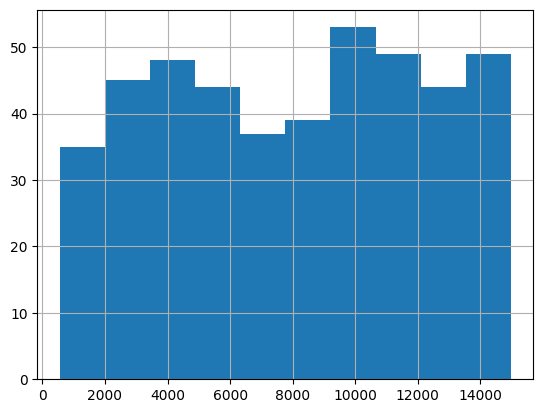

In [ ]:
#مرحله پنجم: چون داده ها نرمال یا نزدیک به نرمال هستند روش استانداردسازی استفاده شده است
df['loan_amount'].hist()
from sklearn.preprocessing import StandardScaler
df_numeric=df.select_dtypes(include=['float64','int64'])
scaler=StandardScaler()
df_numeric_scaled=pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns)
df_final=df.copy()
df_final[df_numeric.columns]=df_numeric_scaled
print(df_final)

In [ ]:
# مرحله ششم: رمزگذاری متغیرهای دسته ای
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df_final['loan_type']=label_encoder.fit_transform(df_final['loan_type'])
print(df_final)


     client_id  loan_type  loan_amount    repaid   loan_id  loan_start  \
0     0.927580          2     1.365030 -1.072607 -1.331973  2002-04-16   
1     0.927580          1     0.434647 -1.072607 -0.056957  2003-10-21   
2     0.927580          2     1.139991  0.932308 -0.046633  2006-02-01   
3     0.927580          0     1.088170  0.932308 -0.724577  2010-12-08   
4     0.927580          1     1.455477  0.932308  0.684652  2010-07-07   
..         ...        ...          ...       ...       ...         ...   
438  -1.542036          3     1.194931 -1.072607 -1.182275  2001-11-26   
439  -1.542036          1    -1.500490  0.932308 -1.323370  2004-01-27   
440  -1.542036          3     0.323088 -1.072607 -1.485112  2001-12-17   
441  -1.542036          2    -0.908145 -1.072607 -1.177113  2003-10-16   
442  -1.542036          2    -1.041057 -1.072607  0.717344  2010-03-24   

       loan_end      rate   Z-Score  BoxCox_Value  
0    2003-12-20 -0.445677  1.365030      1.305338  
1    20

In [ ]:
#  مرحله هفتم: ایجاد متغیرهای جدید

df_final['loan_fee']=df_final['loan_amount']*df_final['rate']
df_final['loan_term']=pd.to_datetime(df_final['loan_end'])-pd.to_datetime(df_final['loan_start'])
print(df_final)


     client_id  loan_type  loan_amount    repaid   loan_id  loan_start  \
0     0.927580          2     1.365030 -1.072607 -1.331973  2002-04-16   
1     0.927580          1     0.434647 -1.072607 -0.056957  2003-10-21   
2     0.927580          2     1.139991  0.932308 -0.046633  2006-02-01   
3     0.927580          0     1.088170  0.932308 -0.724577  2010-12-08   
4     0.927580          1     1.455477  0.932308  0.684652  2010-07-07   
..         ...        ...          ...       ...       ...         ...   
438  -1.542036          3     1.194931 -1.072607 -1.182275  2001-11-26   
439  -1.542036          1    -1.500490  0.932308 -1.323370  2004-01-27   
440  -1.542036          3     0.323088 -1.072607 -1.485112  2001-12-17   
441  -1.542036          2    -0.908145 -1.072607 -1.177113  2003-10-16   
442  -1.542036          2    -1.041057 -1.072607  0.717344  2010-03-24   

       loan_end      rate   Z-Score  BoxCox_Value  loan_fee loan_term  
0    2003-12-20 -0.445677  1.365030    

In [ ]:
# مرحله هشتم : آموزش و تست
# در این مسئله هدف پیش بینی بازپرداخت وام در نظر گرفته شد
#مجموعه آموزش (80 درصد) و مجموعه آزمون ( 20 درصد)

from sklearn.model_selection import train_test_split

X=df_final.drop(columns=['repaid'])
y=df_final['repaid']
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'Training Data: \n{X_trian}')
print(f'Test Data: \n{X_test}')

Training Data: 
     client_id  loan_type  loan_amount   loan_id  loan_start    loan_end  \
17    0.927580          3     0.500144 -1.023973  2004-04-05  2006-10-13   
66    0.936730          1     0.295978  1.410774  2002-06-17  2004-11-14   
248  -1.168836          2    -0.897589 -0.736621  2006-01-20  2008-07-17   
246  -1.168836          2     1.410613  1.226663  2013-03-12  2015-12-01   
31    1.370369          2    -0.221035  0.854998  2014-03-16  2015-12-30   
..         ...        ...          ...       ...         ...         ...   
106   0.076539          2    -1.369498  0.211468  2000-01-26  2002-01-29   
270   0.733248          0     0.371790 -0.555951  2006-10-17  2008-06-06   
348   0.060946          1     0.652728  0.035959  2002-05-29  2004-05-16   
435  -1.542036          2    -1.758396  0.366328  2002-08-08  2004-05-01   
102   0.076539          0    -0.929497  0.677769  2012-12-22  2015-01-17   

         rate   Z-Score  BoxCox_Value  loan_fee loan_term  
17  -0.0405